<a href="https://colab.research.google.com/github/surajjorwar/Mobile-price-range-prediction-/blob/main/Mobile_price_Range_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display, Image
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import log_loss, roc_auc_score


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Mobile-price-prediction/data_mobile_price_range.csv')

In [5]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# **1-EDA**

# VISUALIZING AND ANALYZING RELATIONSHIPS

## 1 - Distributon  of battery power accorss price range

<ipython-input-6-d2503d4686dd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette="Set2")


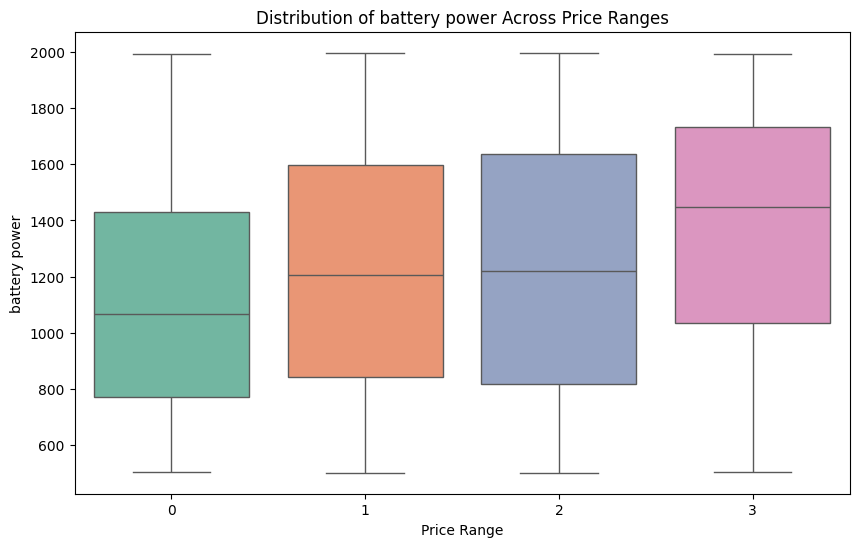

In [6]:
data = df
x = df['price_range']
y = df['battery_power']

plt.figure(figsize=(10, 6))
sns.boxplot(x=x, y=y, data=data, palette="Set2")
plt.title("Distribution of battery power Across Price Ranges")
plt.xlabel("Price Range")
plt.ylabel("battery power")
plt.show()

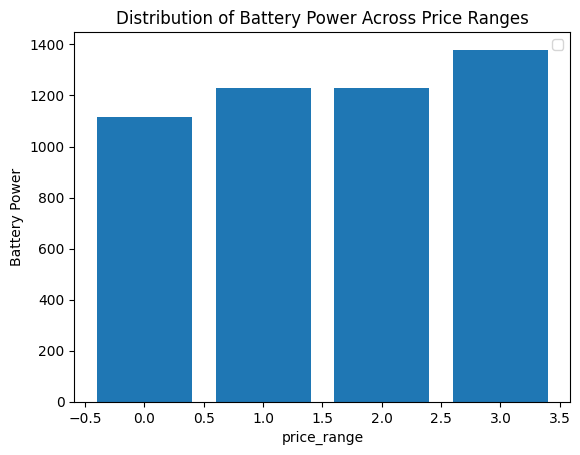

In [7]:
#taking mean value of battery_power W.R.T price range
PR_BP = df.groupby('price_range')['battery_power'].mean().reset_index()

#visualizing  mean of battery power accross price rage
plt.bar(PR_BP['price_range'],PR_BP['battery_power'])
plt.xlabel('price_range')
plt.ylabel('Battery Power')
plt.title('Distribution of Battery Power Across Price Ranges')
plt.legend()

their are no outliers in battery power

In [8]:
#checking unique values in  price_range
df['price_range'].unique()

array([1, 2, 3, 0])

In [9]:
#checking the distribution of data with price_range catogory
df.groupby('price_range')['price_range'].count()

price_range
0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

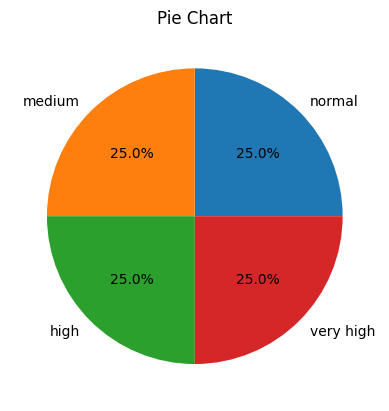

In [10]:
 #dristribution of each price rfange
import matplotlib.pyplot as plt

labels = ['normal', 'medium', 'high', 'very high']


plt.pie(df['price_range'].value_counts(), labels=labels, autopct='%1.1f%%')
plt.title('Pie Chart')
plt.show()

## price range is uniformely distributed

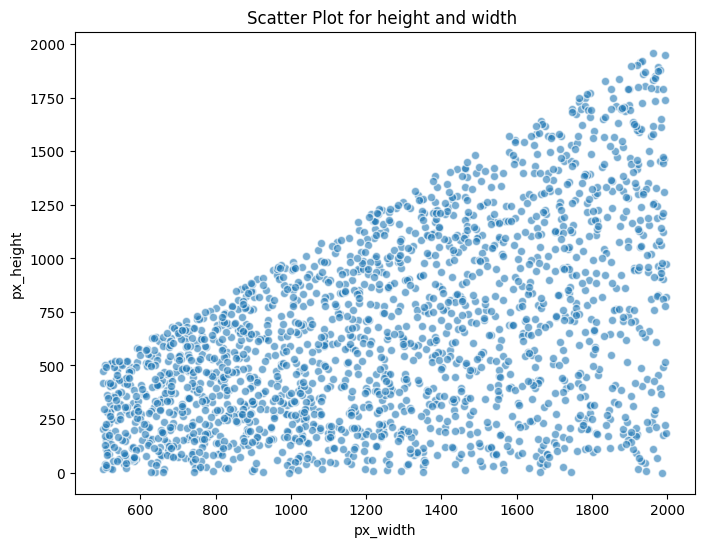

In [11]:
# Method 2: Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter( df['px_width'],df['px_height'], alpha=0.6, edgecolors='w')
plt.title('Scatter Plot for height and width ')
plt.ylabel('px_height')
plt.xlabel('px_width')
plt.show()

pixel height and width is directly proportioinal as hight increases width also increases

# **Visualizing the correlation between battery Power and price** **range**

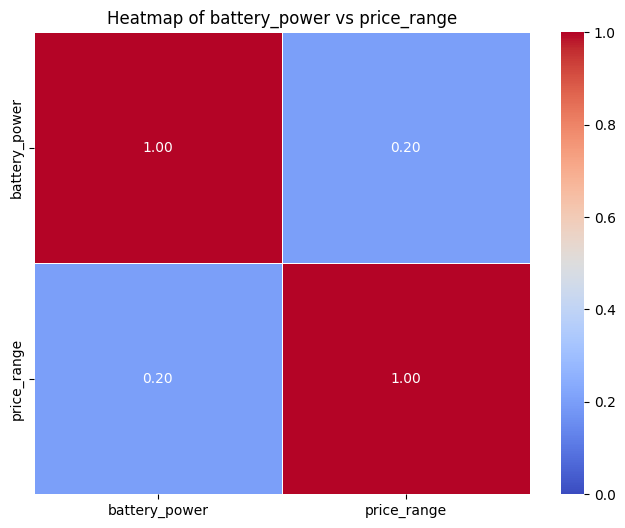

In [12]:
#plotting heat map
data = df[['battery_power','price_range']]

# Compute the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, vmin=0, vmax=1)
plt.title("Heatmap of battery_power vs price_range")
plt.show()

## T**hese two variables shows weak positive relation  it is positive but its too weak to be considered**

##**2 -Distribution of ram accross price range**

<ipython-input-13-5a7ff3018e4e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette="Set2")


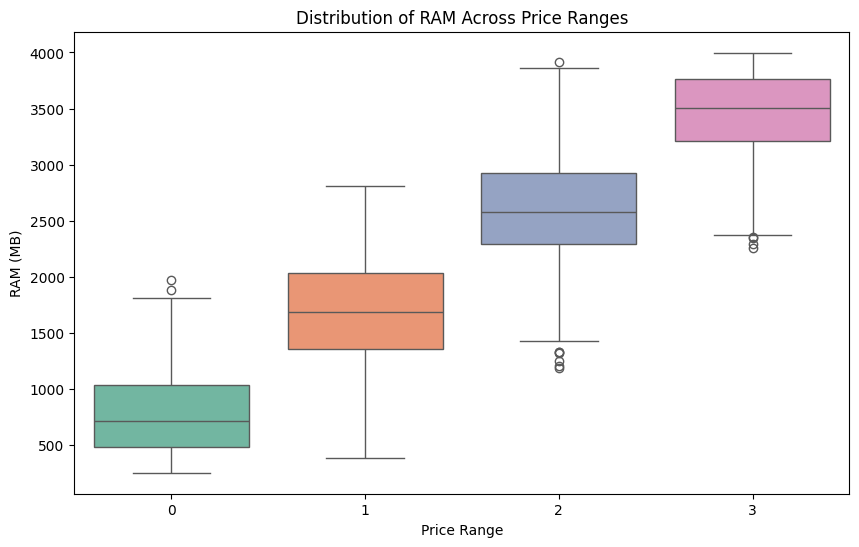

In [13]:
#Distribution of RAM Across Price Ranges
data = df
x = df['price_range']
y = df['ram']

plt.figure(figsize=(10, 6))
sns.boxplot(x=x, y=y, data=data, palette="Set2")
plt.title("Distribution of RAM Across Price Ranges")
plt.xlabel("Price Range")
plt.ylabel("RAM (MB)")
plt.show()

# **we can clearly see the relation of ram and price range and also their** **are outliers in ram variable**  

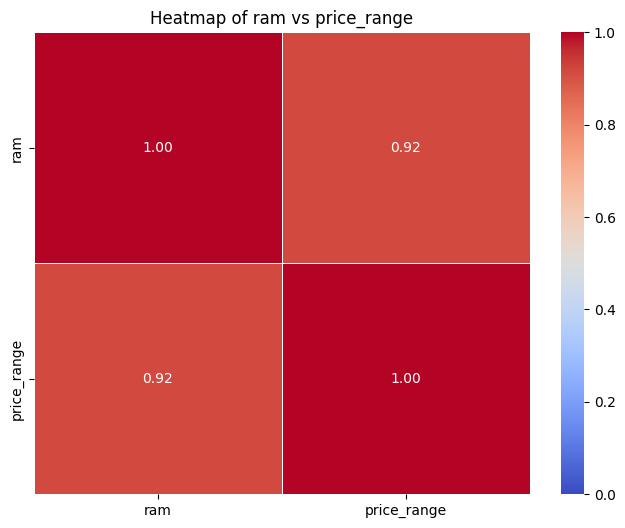

In [14]:
#plotting  Heatmap of ram vs price_range
data = df[['ram','price_range']]

# Compute the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, vmin=0, vmax=1)
plt.title("Heatmap of ram vs price_range")
plt.show()

ram shows positive high correlation with price range it is one of the very important variable in this data set

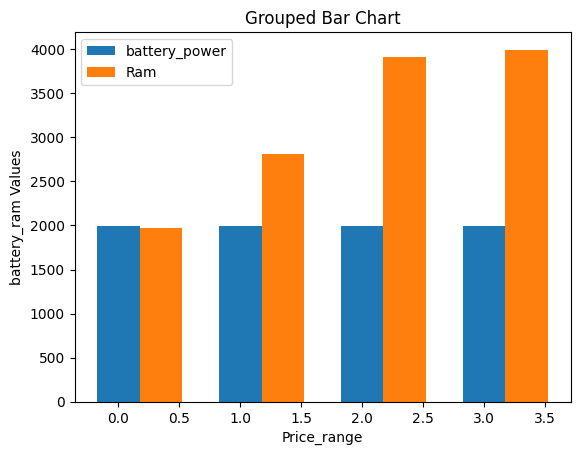

In [15]:
import numpy as np

categories = ['normal', 'medium', 'high', 'very high']
values1 = df['battery_power']
values2 = df['ram']

bar_width = 0.35
index = np.arange(len(categories))

plt.bar(df['price_range'], df['battery_power'], width=bar_width, label='battery_power')
plt.bar(df['price_range'] + bar_width, df['ram'], width=bar_width, label='Ram')

plt.xlabel('Price_range')
plt.ylabel('battery_ram Values')
plt.title('Grouped Bar Chart')
plt.legend()
plt.show()


# **3 - highly correlated  variables**

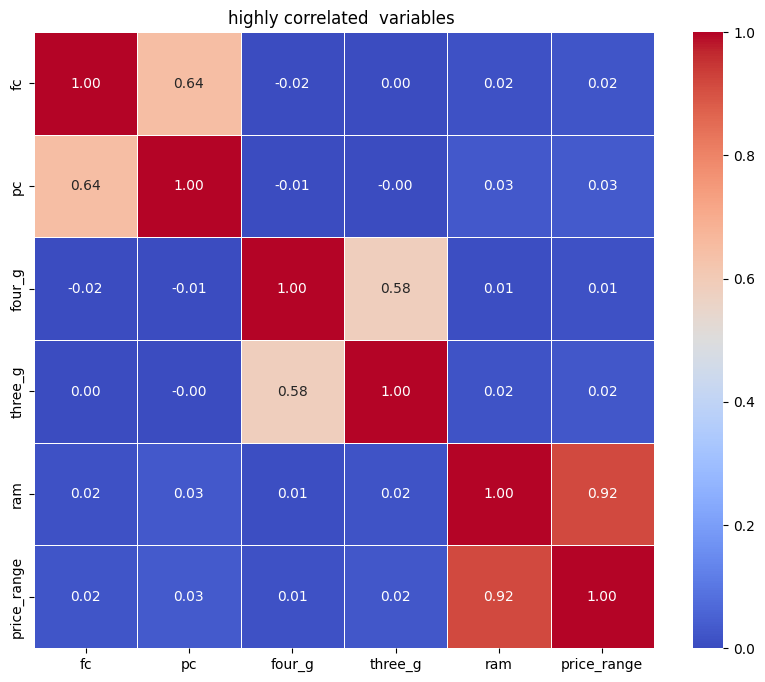

In [16]:
#plotting heat map for highly correlated  variables
data = df[['fc','pc','four_g','three_g','ram','price_range']]

# Compute the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, vmin=0, vmax=1)
plt.title("highly correlated  variables ")
plt.show()

theese are the highly correlated variables
correlation of [fc---->pc = 0.64] ;correlation of [four_g---->three_g = 0.58] ;
correlation of [ram---->price_range = 0.92]



# **2- Clean-up**

In [17]:
#checking the null values in the dataframe
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# **Checking** **outliers with respect to price range**

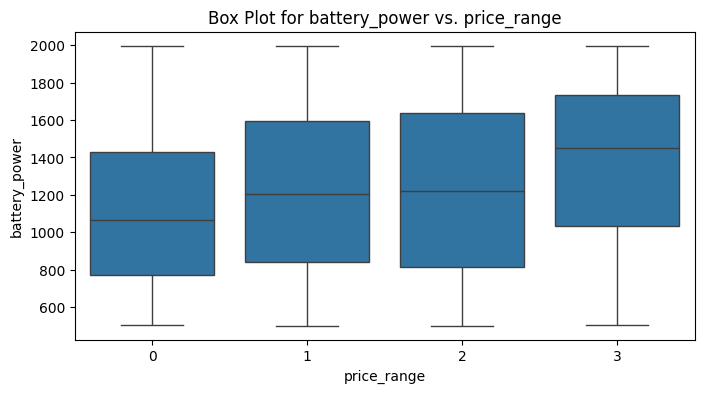

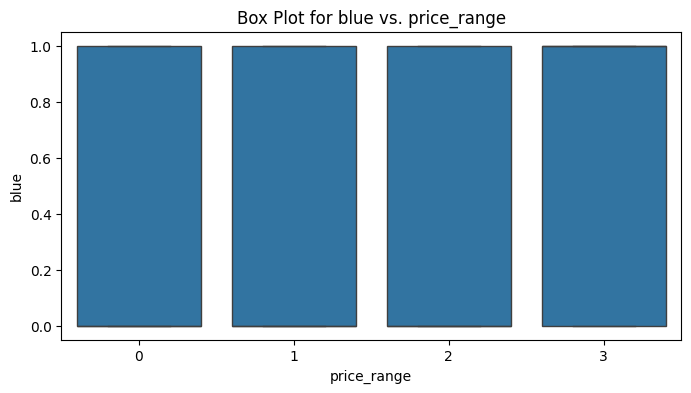

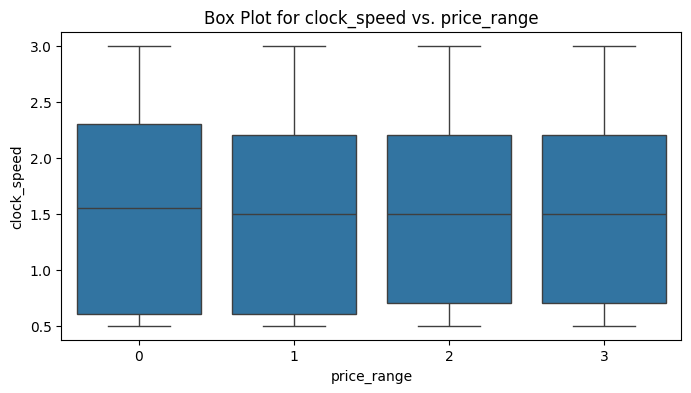

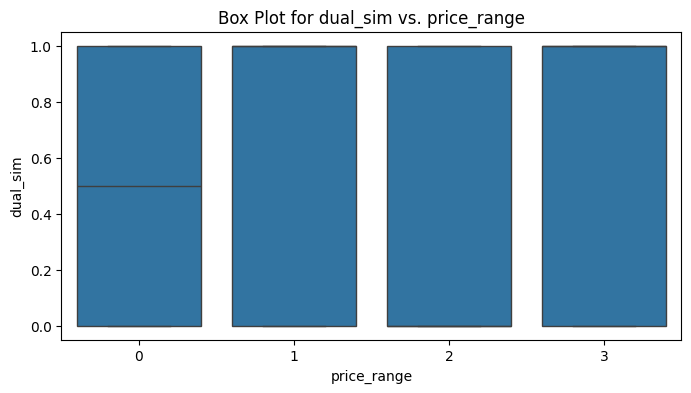

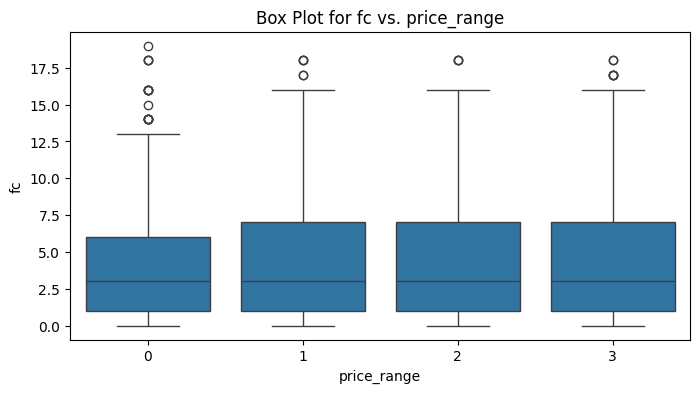

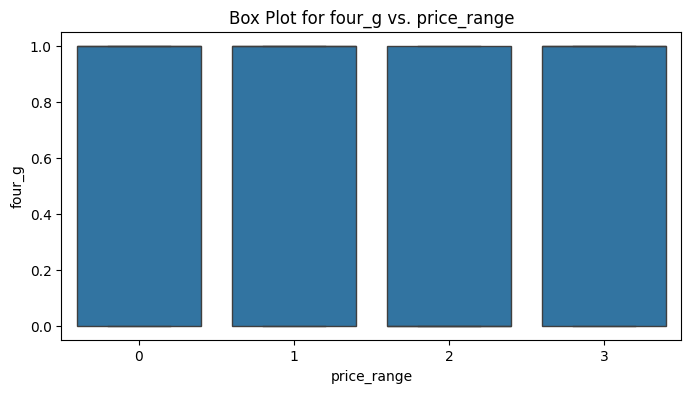

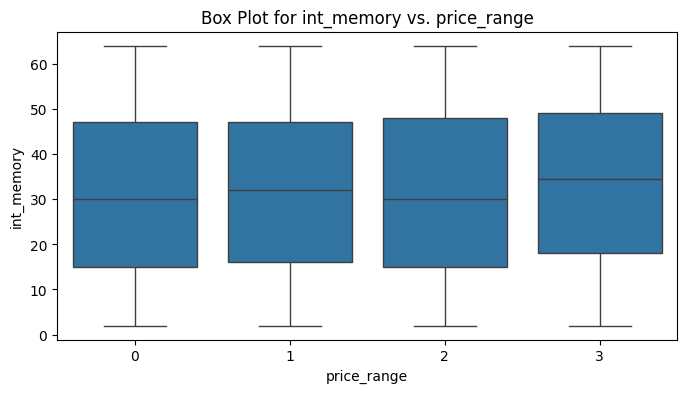

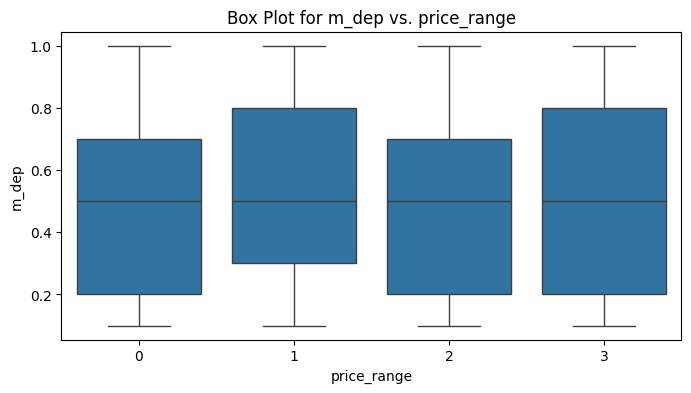

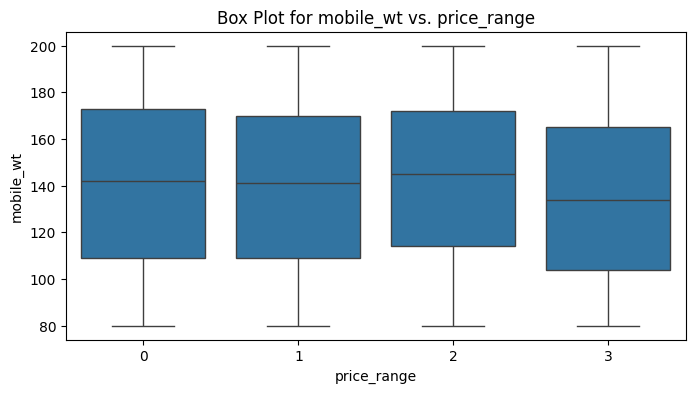

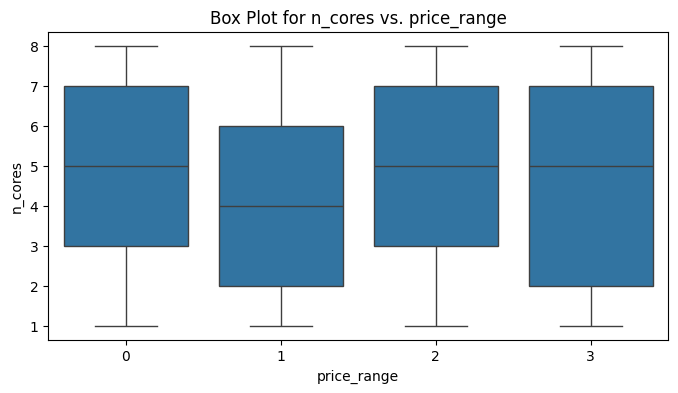

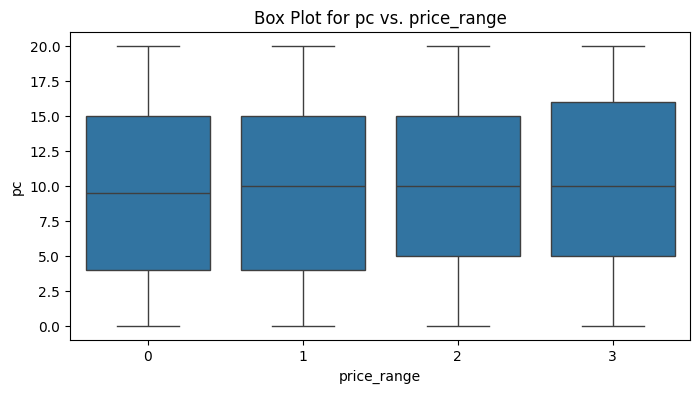

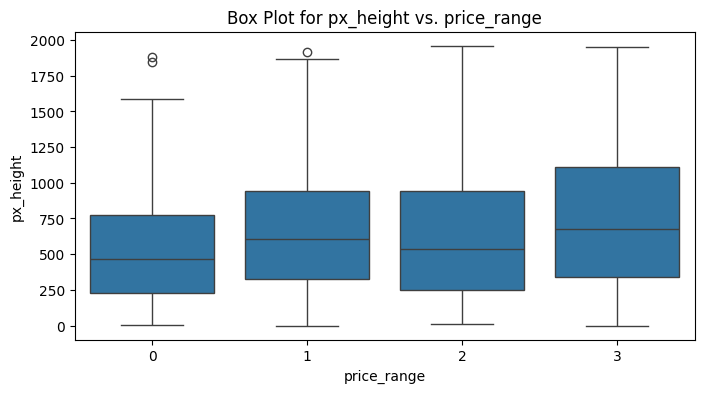

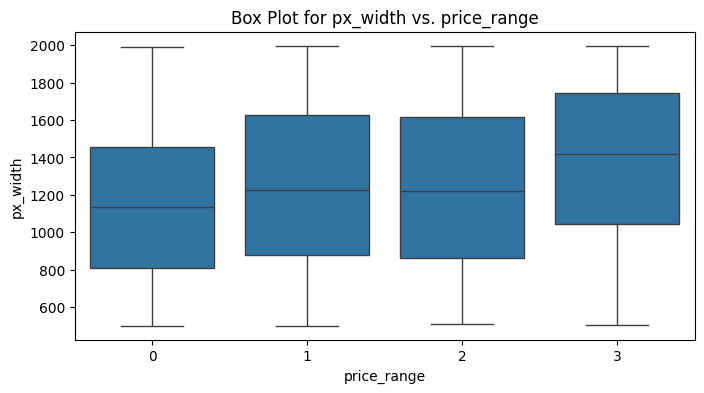

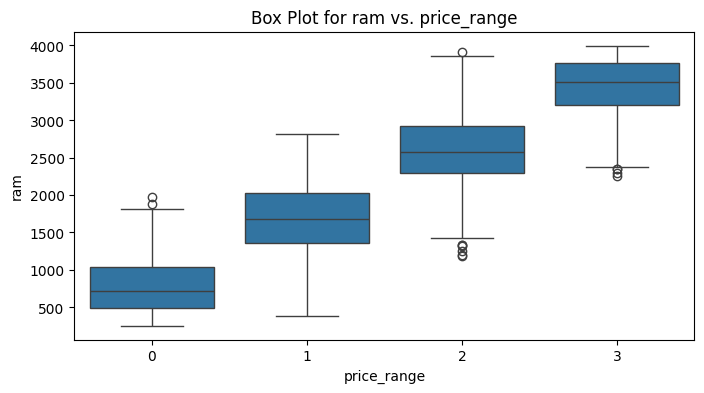

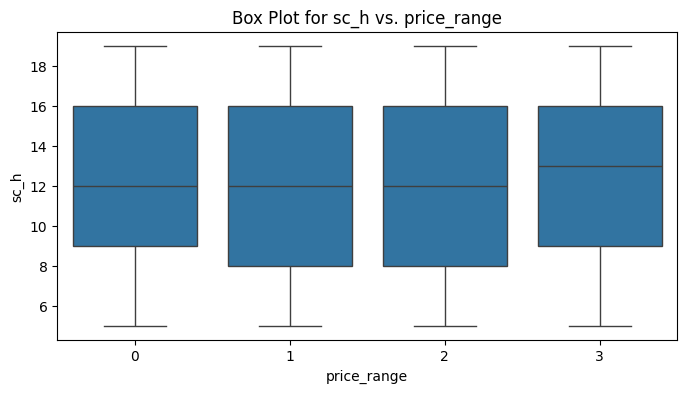

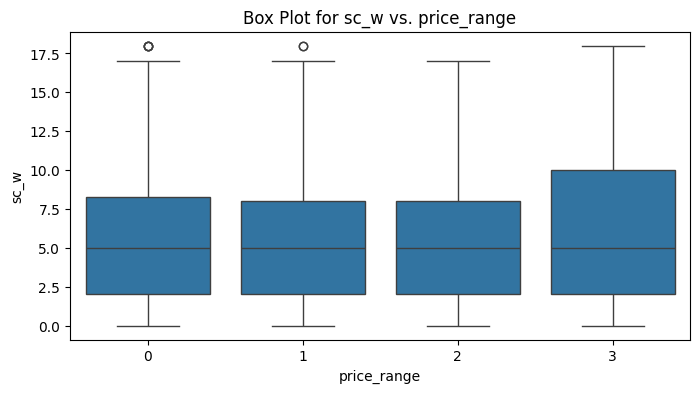

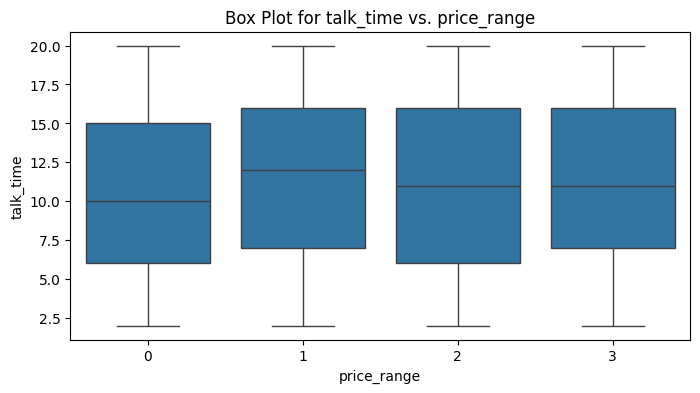

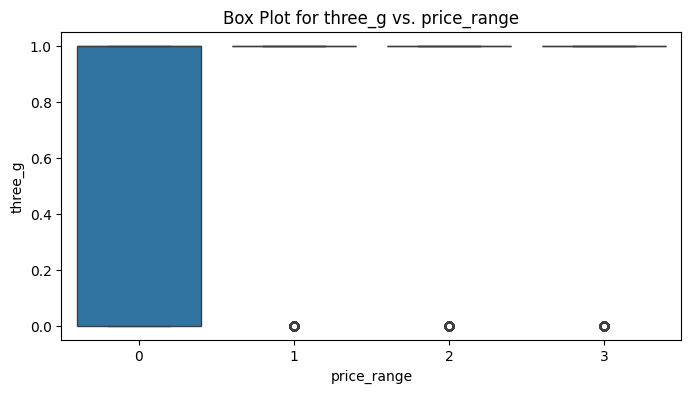

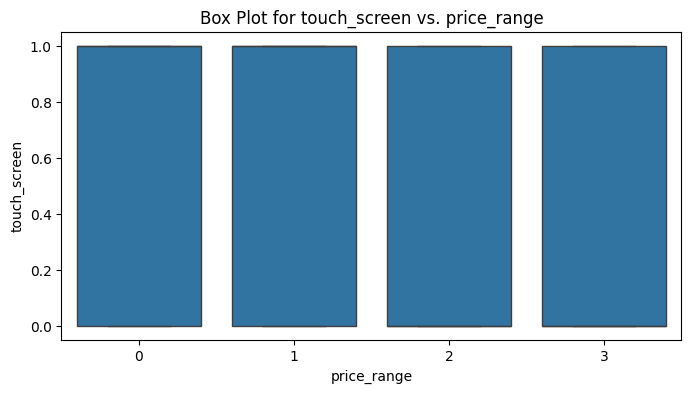

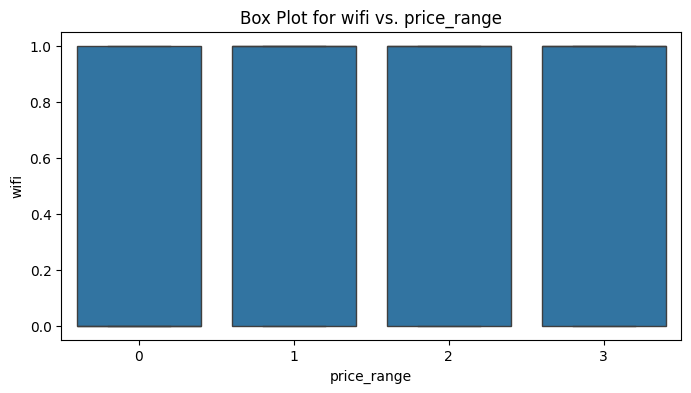

In [18]:
# Create box plots for each feature with respect to "price_range"
for column in df.columns:
    if column != "price_range":
        plt.figure(figsize=(8, 4))
        sns.boxplot(x="price_range", y=column, data=df)
        plt.title(f'Box Plot for {column} vs. price_range')
        plt.show()

## **their** **are outliers in fc ,px_height,ram,sc_w,three_g**
three_g contains binary values  and not continous numerical values so outliers shown in three_g vs price_range using IQR methods are incorrect thats why we are not considering it as outliers **

# **Removing** **outliers**  **from** **these** **variables**

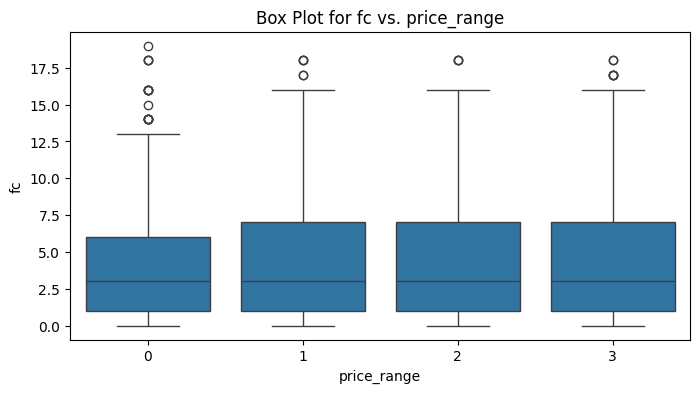

In [19]:
plt.figure(figsize=(8, 4))
sns.boxplot(x="price_range", y="fc", data=df)
plt.title(f'Box Plot for fc vs. price_range')
plt.show()

In [20]:
#splitting data according to price_range categories  ct0 = price_range 0
data = df
ct0 = data[data['price_range']==0]
ct1 = data[data['price_range']==1]
ct2 = data[data['price_range']==2]
ct3 = data[data['price_range']==3]

#creating a function  to remove outliers
def remove_outliers(data):
  for colm in  ['ram','fc','px_height','sc_w']:
    q1= data[colm].quantile(0.25)
    q3= data[colm].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    data =  data[(data[colm] >= lower_bound) & (data[colm] <= upper_bound)]
  return data

#removing outliers from 'ram','fc','px_height','sc_w' columns

cleaned_ct0 = remove_outliers(ct0)
cleaned_ct1 = remove_outliers(ct1)
cleaned_ct2 = remove_outliers(ct2)
cleaned_ct3 = remove_outliers(ct3)
df= pd.concat([cleaned_ct0 , cleaned_ct1 , cleaned_ct2 , cleaned_ct3])
df.shape



(1950, 21)

# **3-Feature Engineering**

we are creating new column  resolution which is the product of px_height andpx_weight

In [21]:
df['resolution'] = df['px_height']* df['px_width']
#also removing px_height and px_weight
df.drop(columns = (['px_height','px_width']),inplace = True)

In [22]:
#checking if the shape of mobile is square or not
square = df[df['sc_h']==df['sc_w']]
square


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,resolution


In [23]:
#creating new feature screen_area  area of rectangle is height * weidth
df['screen_area'] = df['sc_h']*df['sc_w']
df.drop(columns = (['sc_h','sc_w']),inplace = True)

In [24]:
#creating 3 new categories 2G , 3G , dual  and removing three_g and four_g to increase model accuracy
df['3G'] = np.where((df['three_g'] == 1) & (df['four_g'] == 0), 1, 0)
df['2G'] = np.where((df['three_g'] == 0) & (df['four_g'] == 0), 1, 0)
df['dual'] = np.where((df['three_g'] == 1) & (df['four_g'] == 1), 1, 0)
df.drop(columns = (['three_g','four_g']),inplace = True)



Scaling the data

In [25]:
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame and you want to scale certain columns
columns_to_scale = ['battery_power', 'int_memory','mobile_wt', 'ram', 'talk_time','resolution','screen_area']

# Create a StandardScaler instance
scaler = MinMaxScaler()

# Fit the scaler on the selected columns and transform the data
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [26]:
df['price_range'] = df['price_range'].astype(str)

# Splitting the data  into training and testing sets  

In [87]:
#input and target variables x and y
x=df.drop(columns = (['price_range']))
y=df['price_range']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# **MODEL IMPLEMENTATION**

# **Decision Tree**

In [88]:
#DecisionTreeClassifier classifier
clf = DecisionTreeClassifier(max_depth = 6 ,min_samples_leaf=2,random_state=42)

#training  the classifier
clf.fit(X_train, y_train)

#predicting the value
y_pred = clf.predict(X_test)

#evaluating the accuracy
print("Accuracy Score ",accuracy_score(y_test, y_pred))
class_report = classification_report(y_test, y_pred)
print("classification_report \n ",class_report)

Accuracy Score  0.8871794871794871
classification_report 
                precision    recall  f1-score   support

           0       0.97      0.96      0.96       100
           1       0.85      0.87      0.86        94
           2       0.82      0.79      0.81        97
           3       0.90      0.92      0.91        99

    accuracy                           0.89       390
   macro avg       0.89      0.89      0.89       390
weighted avg       0.89      0.89      0.89       390



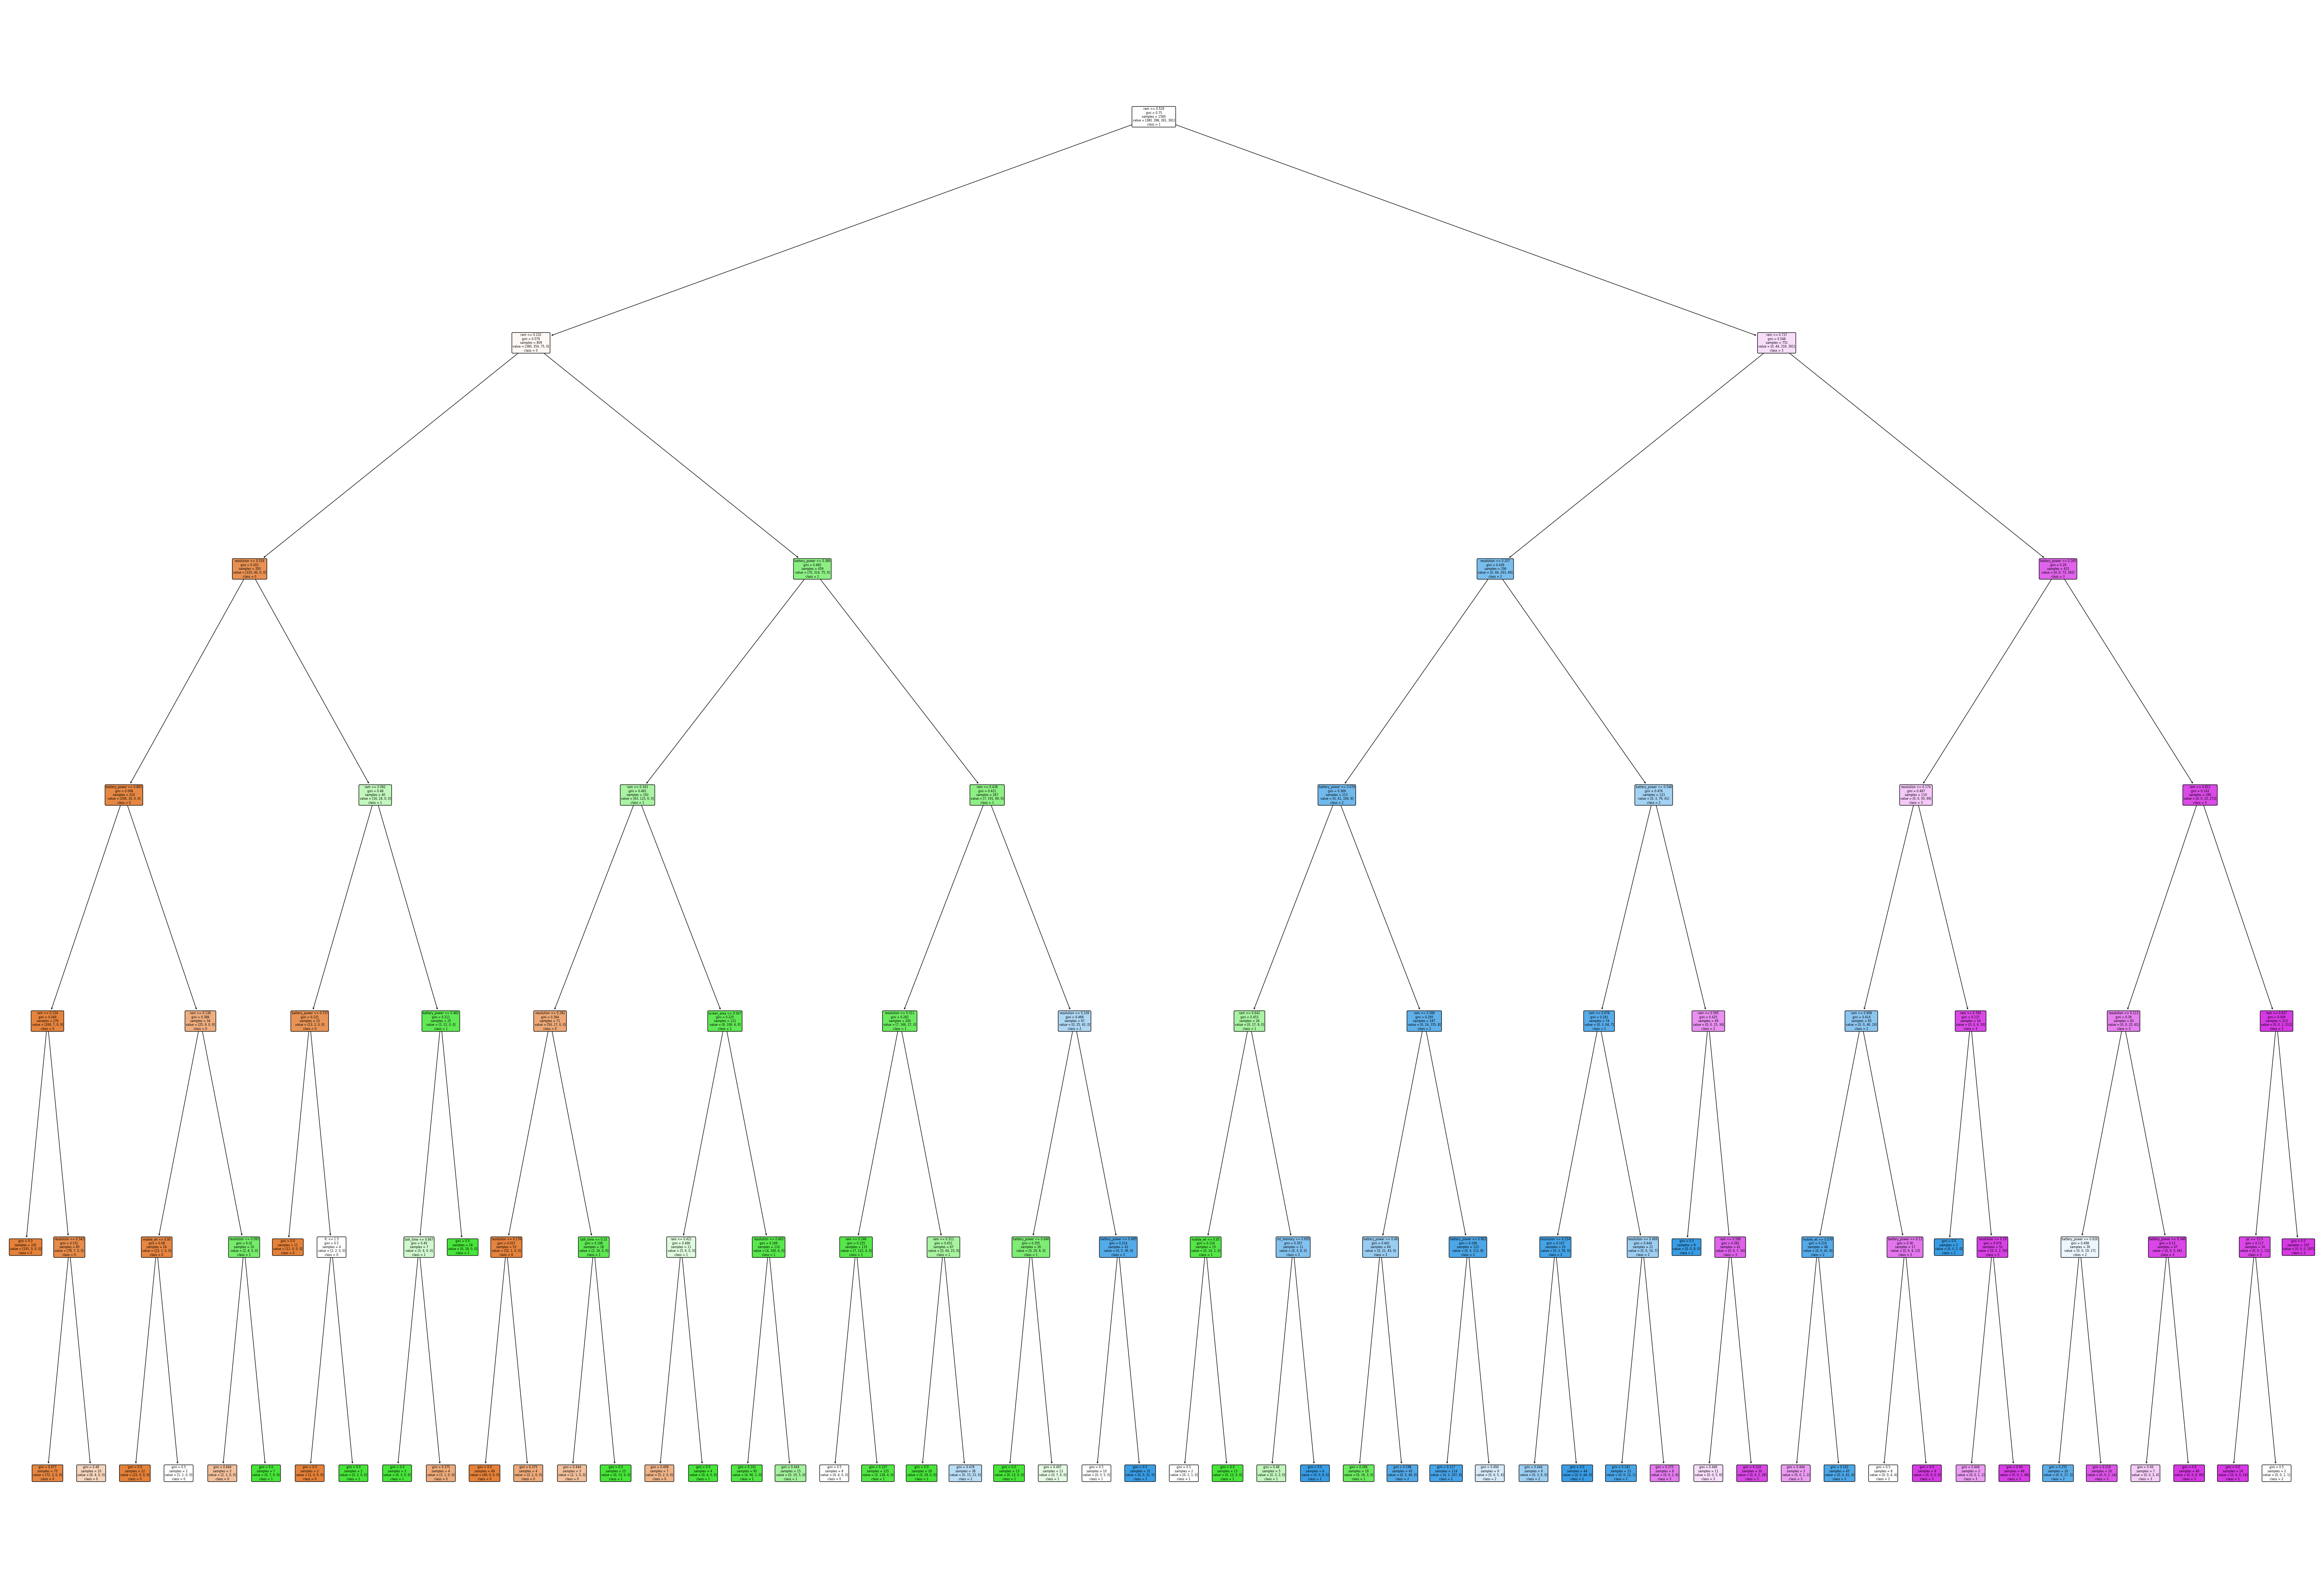

In [28]:
plt.figure(figsize=(80, 55))  # Adjust the figure size as needed
plot_tree(clf, feature_names=x.columns, class_names=df['price_range'].unique(), filled=True, rounded=True)
plt.show()

#Grid Search CV for  Random Forest Classifier




In [29]:
#from sklearn.model_selection import GridSearchCV
#
## Define the parameter grid
#param_grid = {
#    'n_estimators': [50, 100, 200],
#    'max_depth': [None , 10, 20],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4]
#}
#
## Creating the grid search
#grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5,error_score='raise')
#grid_search.fit(x, y)
#
# #Get the best parameters
#best_params = grid_search.best_params_
#print("Best Hyperparameters:", best_params)
#
## Use the best parameters in the model
#best_model = grid_search.best_estimator_
#

# Random Forest

In [89]:
#random forest classifier
random_forest =  RandomForestClassifier( min_samples_leaf=2, min_samples_split=2, n_estimators=100,random_state=42)
#training the classifier
random_forest.fit(X_train, y_train)
#predicting the value
y_pred_rf = random_forest.predict(X_test)
#evaluating the accuracy
print("Accuracy Score ",accuracy_score(y_test, y_pred_rf))
class_report = classification_report(y_test, y_pred_rf)
print("classification_report \n ",class_report)


Accuracy Score  0.8923076923076924
classification_report 
                precision    recall  f1-score   support

           0       0.97      0.96      0.96       100
           1       0.83      0.84      0.84        94
           2       0.80      0.85      0.82        97
           3       0.97      0.92      0.94        99

    accuracy                           0.89       390
   macro avg       0.89      0.89      0.89       390
weighted avg       0.89      0.89      0.89       390



# Support Vector Machines

In [85]:
#SVM classifier
svm_classifier = SVC(kernel="poly", degree=3, coef0=1, C=5,probability=True)#training the classifier
svm_classifier.fit(X_train, y_train)
#predicting the value
y_pred_svm = svm_classifier.predict(X_test)
#evaluating the accuracy
print("Accuracy Score ",accuracy_score(y_test, y_pred_svm))
class_report = classification_report(y_test, y_pred_svm)
print("classification_report \n ",class_report)

Accuracy Score  0.9128205128205128
classification_report 
                precision    recall  f1-score   support

           0       0.96      0.98      0.97       100
           1       0.88      0.90      0.89        94
           2       0.86      0.86      0.86        97
           3       0.96      0.91      0.93        99

    accuracy                           0.91       390
   macro avg       0.91      0.91      0.91       390
weighted avg       0.91      0.91      0.91       390



# Logistic Regression

In [90]:
#logistic regression  classifier
log_clf = LogisticRegression(max_iter=1500,random_state=42)
log_clf.fit(X_train, y_train)
#predicting the value
y_pred_log = log_clf.predict(X_test)
#evaluating the accuracy
print("Accuracy Score ",accuracy_score(y_test, y_pred_log))
class_report = classification_report(y_test, y_pred_log)
print("classification_report \n ",class_report)


Accuracy Score  0.9179487179487179
classification_report 
                precision    recall  f1-score   support

           0       0.96      0.99      0.98       100
           1       0.90      0.88      0.89        94
           2       0.89      0.82      0.86        97
           3       0.91      0.97      0.94        99

    accuracy                           0.92       390
   macro avg       0.92      0.92      0.92       390
weighted avg       0.92      0.92      0.92       390



Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       100
           1       0.85      0.87      0.86        94
           2       0.82      0.79      0.81        97
           3       0.90      0.92      0.91        99

    accuracy                           0.89       390
   macro avg       0.89      0.89      0.89       390
weighted avg       0.89      0.89      0.89       390



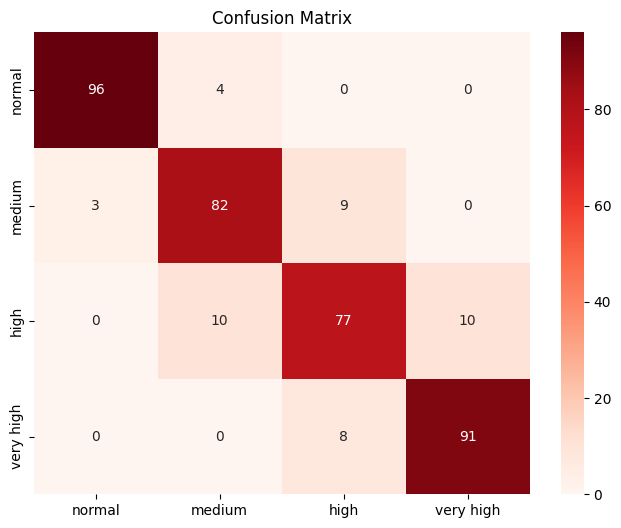

In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#  heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['normal', 'medium', 'high', 'very high'],
            yticklabels=['normal', 'medium', 'high', 'very high'])
plt.title('Confusion Matrix')
plt.show()

# **# Feature importance**

Cross-Validation Scores: [0.84615385 0.86217949 0.84294872 0.86538462 0.88782051]
Feature ranking:
ram: 0.5368615355171958
battery_power: 0.07327533668338035
resolution: 0.07089979942244831
mobile_wt: 0.040292812096333244
screen_area: 0.038592591981554784
int_memory: 0.038500393441796045
pc: 0.028634629240414315
clock_speed: 0.02862194534304673
talk_time: 0.028057512308138945
fc: 0.024640714901302416
m_dep: 0.024581060987901276
n_cores: 0.024218327406306674
touch_screen: 0.007458963024979582
wifi: 0.00707532307858862
dual_sim: 0.006616535183118635
blue: 0.006223384860759735
dual: 0.0062124063756283645
3G: 0.00490496332037771
2G: 0.004331764826728468


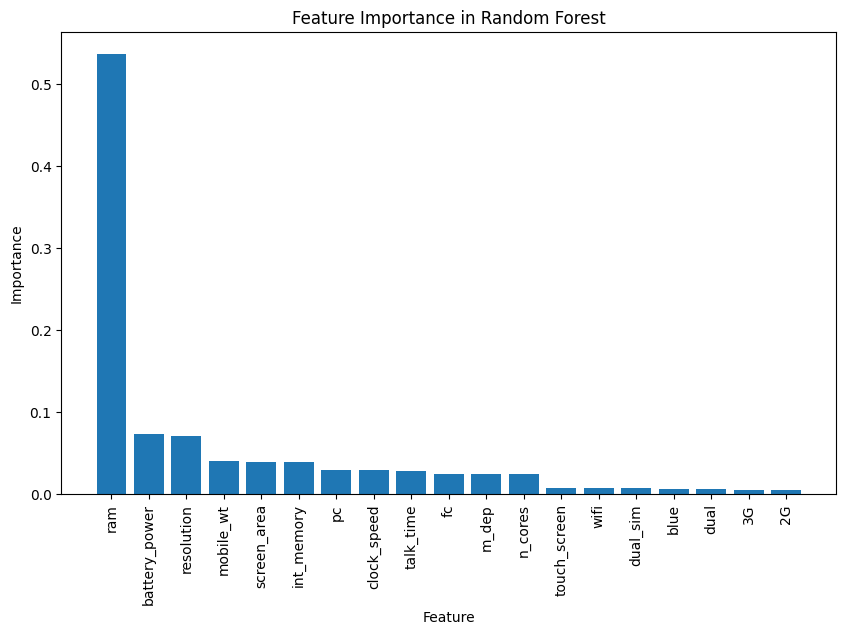

In [32]:
from sklearn.model_selection import cross_val_score
# feature importances using cross-validation
cv_scores = cross_val_score(random_forest, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)

# Fit the model
random_forest.fit(X_train, y_train)

# feature importances
feature_importances = random_forest.feature_importances_

# Get the indices of features sorted by importance
indices = np.argsort(feature_importances)[::-1]

# feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{X_train.columns[indices[f]]}: {feature_importances[indices[f]]}")

# Plot feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance in Random Forest")
plt.show()


IMPLEMENTING Voting Classifiers an ensemble technique

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC



log_clf = LogisticRegression(max_iter=1500,random_state=42)
rnd_clf = RandomForestClassifier( min_samples_leaf=2, min_samples_split=2, n_estimators=100,random_state=42)
dt = DecisionTreeClassifier(max_depth = 6 ,min_samples_leaf=2,random_state=42)
svm_classifier = SVC(kernel="poly", degree=3, coef0=1, C=5,probability=True)


voting_clf = VotingClassifier(
 estimators=[('lr', log_clf), ('rf', rnd_clf), ('dt', dt),('svm',svm_classifier)],
 voting="soft")
voting_clf.fit(X_train, y_train)

for clf in (log_clf, rnd_clf,dt,svm_classifier,voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    class_report = classification_report(y_test, y_pred)
print(class_report)


LogisticRegression 0.9179487179487179
RandomForestClassifier 0.8923076923076924
DecisionTreeClassifier 0.8871794871794871
SVC 0.9128205128205128
VotingClassifier 0.9282051282051282
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       100
           1       0.90      0.91      0.91        94
           2       0.90      0.89      0.89        97
           3       0.96      0.94      0.95        99

    accuracy                           0.93       390
   macro avg       0.93      0.93      0.93       390
weighted avg       0.93      0.93      0.93       390



Confusion Matrix:
[[96  4  0  0]
 [ 3 82  9  0]
 [ 0 10 77 10]
 [ 0  0  8 91]]


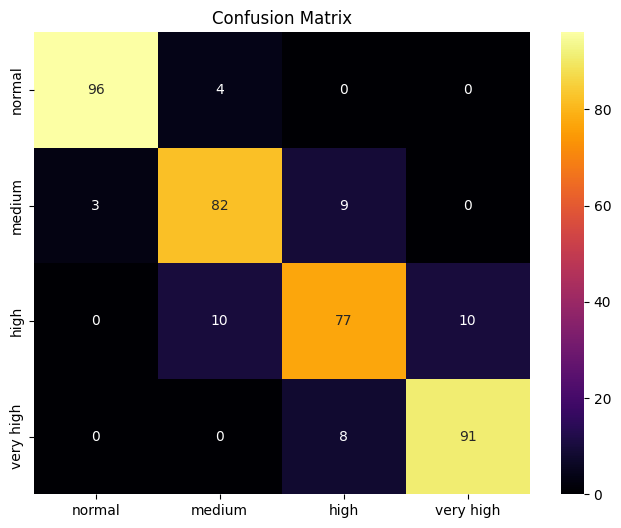

In [93]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='inferno', xticklabels=['normal', 'medium', 'high', 'very high'],
            yticklabels=['normal', 'medium', 'high', 'very high'])
plt.title('Confusion Matrix')
plt.show()

# **AUC AND  LOGARITHMIC LOSS**

In [54]:

models = {
    "LogisticRegression": LogisticRegression(max_iter=1500,random_state=42),
    "RandomForestClassifier":  RandomForestClassifier( min_samples_leaf=2, min_samples_split=2, n_estimators=100,random_state=42),
    "DecisionTreeClassifier":  DecisionTreeClassifier(max_depth = 6 ,min_samples_leaf=2,random_state=42),
    "SVC": SVC(kernel="poly", degree=3, coef0=1, C=5,probability=True),
    "VotingClassifier": VotingClassifier(
 estimators=[('lr', log_clf), ('rf', rnd_clf), ('dt', dt),('svm',svm_classifier)],
 voting="soft")
}

# for loop to iterate through each model and
for model_name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred_proba = clf.predict_proba(X_test)
    log_loss_score = log_loss(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovo', average='macro')
    print(f"Model: {model_name}")
    print(f"Logarithmic Loss: {log_loss_score}")
    print(f"Area Under Curve (AUC): {auc_score}\n")


Model: LogisticRegression
Logarithmic Loss: 0.4426180924471279
Area Under Curve (AUC): 0.9874567474112331

Model: RandomForestClassifier
Logarithmic Loss: 0.5307033651311392
Area Under Curve (AUC): 0.9763102325440558

Model: DecisionTreeClassifier
Logarithmic Loss: 0.7392868137005191
Area Under Curve (AUC): 0.9704421195208649

Model: SVC
Logarithmic Loss: 0.26362594674666
Area Under Curve (AUC): 0.984399077785237

Model: VotingClassifier
Logarithmic Loss: 0.3332896334747113
Area Under Curve (AUC): 0.9901627483432706



by observing above AUC and Logarithmic Loss   we can say that SVM performance is more efficient than other algorithms

# **CONCLUSION**

voting classifier aggregates through each classifiers classification and the class with majority of prediction is classified


1.No class imbalance observed; precision and recall trade-off values are
  equal, indicating a balanced class.

2.Decision Tree(DT) accuracy : 0.84 , Random Forest Classifier(RFC) accuracy : 0.86 , Support Vector Machines (SVM) : 0.43, Logistic Regression(LR) : 0.86

3.Hyperparameter tuning  achieves model accuracy for
Decision Tree (DT) accuracy : 0.88 ,  Random Forest Classifier(RFC) accuracy : 0.89,
Support Vector Machines (SVM) accuracy : 0.91 , Logistic Regression(LR) accuracy : 0.91

4.Most important features (descending order): RAM, resolution,battery_power,mobile_wt, screen_area, int_memory, talk_time, clock_speed, pc, m_dep, fc, n_cores.

5.Model reaches a peak accuracy of 92%.
6.Final  Model Selection :-I select Support Vector Machines because its performance based on evaluation matrix outsmarts other  algorithm with  Accuracy : 0.91,
Precision : 0.91,
Recall : 0.91,
Logarithmic Loss: 0.26,
Area Under Curve (AUC): 0.98
